In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
 # Importing the warnings module to manage warning messages
import warnings
warnings.filterwarnings("ignore")
sns.set(style='whitegrid')

In [66]:
# Reading the CSV file named 'Fraud.csv' into a pandas DataFrame called 'data'
data = pd.read_csv('Fraud.csv')

In [67]:
# Displays the first 5 rows of the DataFrame to get a quick overview of the data
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [68]:
# Displays summary information about the DataFrame including column names, data types, and non-null counts
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [69]:
 # Returns a list of column names present in the DataFrame
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [70]:
# Counts the occurrences of each unique value in the 'isFraud' column (e.g., number of fraud vs. non-fraud cases)
data['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [71]:
# Counts how many times each value appears in the 'isFlaggedFraud' column (flagged vs. not flagged)
data['isFlaggedFraud'].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [72]:
 # Calculates the total number of missing (null) values in the entire DataFrame
data.isnull().sum().sum()

np.int64(0)

In [73]:
# Returns a tuple showing the number of rows and columns in the DataFrame (rows, columns)
data.shape

(6362620, 11)

In [74]:
# Counts the number of times each unique value appears in the 'isFraud' column
data['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [75]:
# Calculate Fraud %
round((data['isFraud'].value_counts()[1] / data.shape[0]) + 100)

100

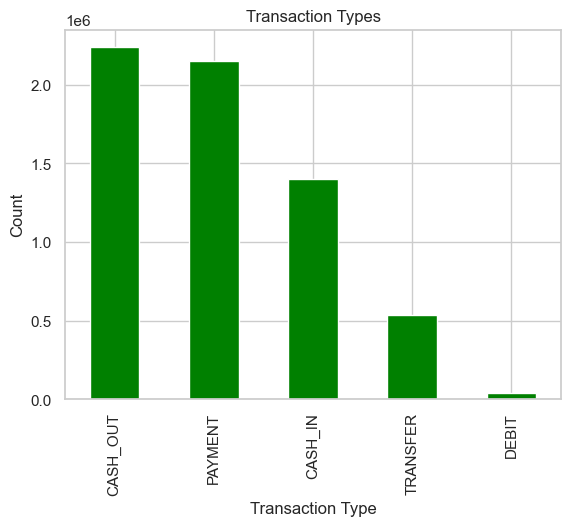

In [76]:
data['type'].value_counts().plot(kind='bar',title='Transaction Types',color = 'green')  # Creates a bar chart showing the count of each transaction type in green
plt.xlabel('Transaction Type')  # Labels the x-axis as 'Transaction Type'
plt.ylabel('Count') # Labels the y-axis as 'Count
plt.show() # Displays the plot

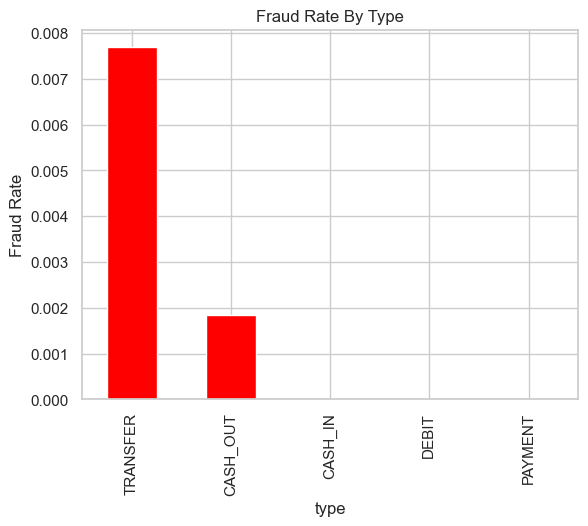

In [77]:
fraud_by_type = data.groupby('type')['isFraud'].mean().sort_values(ascending=False)  # Groups data by 'type', calculates fraud rate (mean of isFraud), and sorts in descending order
fraud_by_type.plot(kind='bar',title='Fraud Rate By Type',color = 'red')  # Plots the fraud rate per transaction type as a red bar chart
plt.ylabel('Fraud Rate')  # Labels the y-axis as 'Fraud Rate'
plt.show() # Displays the plot

In [78]:
data['amount'].describe().astype(int) # Generates descriptive statistics (count, mean, std, min, etc.) for the 'amount' column and converts the results to integer type

count     6362620
mean       179861
std        603858
min             0
25%         13389
50%         74871
75%        208721
max      92445516
Name: amount, dtype: int64

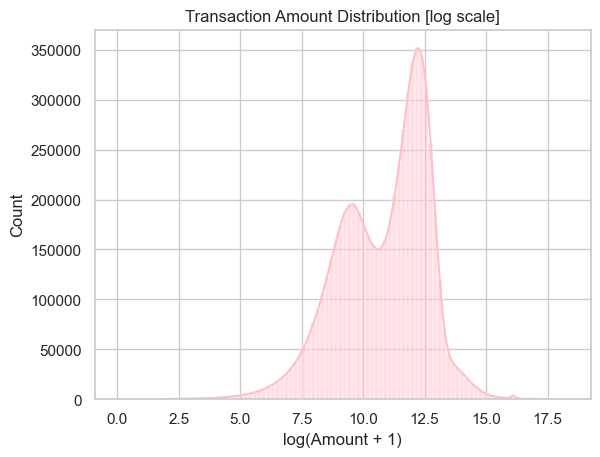

In [79]:
sns.histplot(np.log1p(data['amount']),bins=100,kde=True,color='pink') # Plots histogram of log-transformed 'amount' with 100 bins, adds KDE curve, color pink
plt.title('Transaction Amount Distribution [log scale]')  # Sets the title of the plot
plt.xlabel('log(Amount + 1)') # Labels the x-axis with 'log(Amount + 1)'
plt.show() # Displays the plot

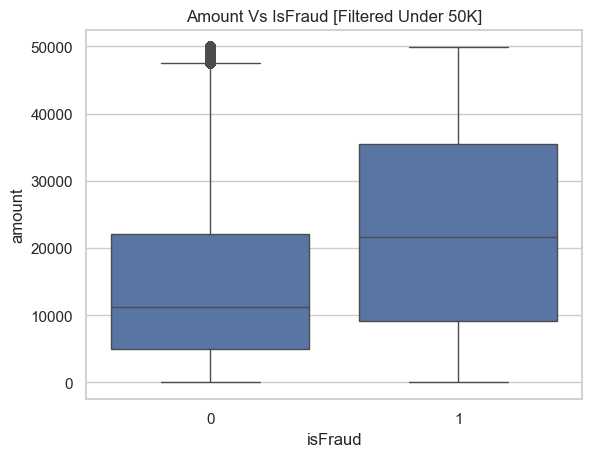

In [80]:
sns.boxplot(data= data[data['amount']<50000],x= 'isFraud',y='amount') # Creates a boxplot of 'amount' vs. 'isFraud' for transactions where amount is less than 50,000
plt.title('Amount Vs IsFraud [Filtered Under 50K]')  # Sets the title of the plot
plt.show() # Displays the plot

In [82]:
data.columns  # Displays the list of column names in the DataFrame

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [83]:
data['balanceDiffOrig'] = data['oldbalanceOrg'] - data['newbalanceOrig']  # Creates a new column 'balanceDiffOrig' showing the difference between old and new origin account balance
data['balanceDiffDest'] = data['newbalanceDest'] - data['oldbalanceDest']  # Creates a new column 'balanceDiffDest' showing the difference between new and old destination account balance

In [84]:
data['balanceDiffOrig']<0 # Checks if 'balanceDiffOrig' is negative for each row; returns a boolean Series (True/False)

0          False
1          False
2          False
3          False
4          False
           ...  
6362615    False
6362616    False
6362617    False
6362618    False
6362619    False
Name: balanceDiffOrig, Length: 6362620, dtype: bool

In [85]:
(data['balanceDiffOrig']<0).sum() # Counts the total number of rows where 'balanceDiffOrig' is negative (invalid balance differences)

np.int64(1399253)

In [86]:
(data['balanceDiffDest']<0).sum() # Counts the total number of rows where 'balanceDiffDest' is negative (invalid balance differences)

np.int64(1238864)

In [87]:
data.head(2) # Displays the first 2 rows of the DataFrame for a quick preview

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0


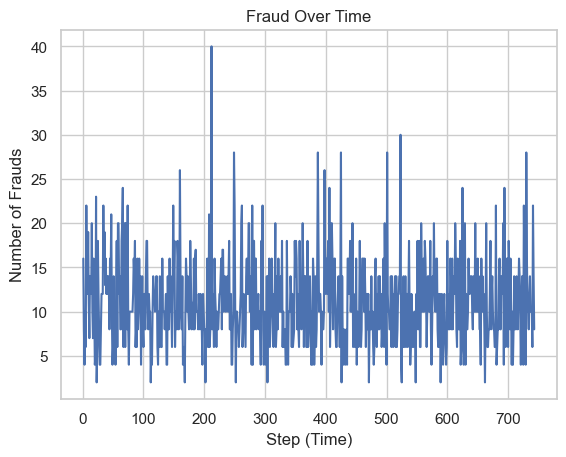

In [88]:
fraud_per_step = data[data['isFraud'] == 1]['step'].value_counts().sort_index() # Counts fraud cases per 'step' (time) and sorts by step number
plt.plot(fraud_per_step.index,fraud_per_step.values,label= 'Frauds per step') # Plots frauds per time step as a line chart
plt.xlabel('Step (Time)') # Labels the x-axis as 'Step (Time)'
plt.ylabel('Number of Frauds')  # Labels the y-axis as 'Number of Frauds'
plt.title('Fraud Over Time') # Sets the plot title
plt.grid(True) # Adds a grid to the plot for better readability
plt.show() # Displays the plot


In [89]:
data.drop(columns='step',inplace=True) # Drops the 'step' column from the DataFrame and updates the DataFrame in place

In [90]:
data.head() # display

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,-21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


In [91]:
top_senders = data['nameOrig'].value_counts().head(10) # Counts how many times each sender appears and returns the top 10 most frequent senders

In [92]:
top_senders

nameOrig
C1677795071    3
C1999539787    3
C724452879     3
C1976208114    3
C400299098     3
C1784010646    3
C1530544995    3
C1065307291    3
C545315117     3
C1902386530    3
Name: count, dtype: int64

In [93]:
top_receivers = data['nameDest'].value_counts().head(10)  # Counts how many times each receiver appears and returns the top 10 most frequent receivers

In [94]:
top_receivers

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
C1590550415    101
C1789550256     99
C451111351      99
C1360767589     98
C1023714065     97
Name: count, dtype: int64

In [95]:
fraud_users = data[data['isFraud'] == 1]['nameOrig'].value_counts().head(10)
# Filters the data to include only fraudulent transactions (isFraud == 1), 
# then counts how many times each sender (nameOrig) appears,
# and returns the top 10 most frequent fraudulent senders

In [96]:
fraud_users

nameOrig
C1280323807    1
C1305486145    1
C840083671     1
C1420196421    1
C2101527076    1
C1039979813    1
C2089752665    1
C1614818636    1
C40604503      1
C1970706589    1
Name: count, dtype: int64

In [97]:
fraud_types = data[data['type'].isin(['TRANSFER',"CASH_OUT"])]
# Selects transactions marked as fraud (isFraud == 1),
# counts how often each sender (nameOrig) is involved in fraud,
# and returns the top 10 most frequent fraudulent senders

In [98]:
fraud_types['type'].value_counts() 

# Counts the number of fraudulent transactions for each transaction type 
# (like 'TRANSFER', 'CASH_OUT') from the fraud_types DataFrame

type
CASH_OUT    2237500
TRANSFER     532909
Name: count, dtype: int64

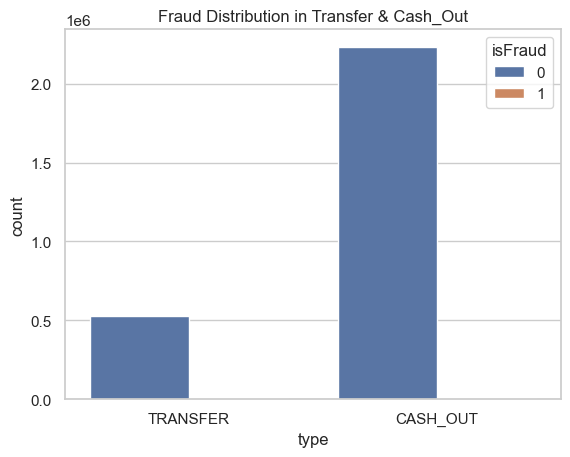

In [99]:
sns.countplot(data=fraud_types,x='type',hue='isFraud')
plt.title('Fraud Distribution in Transfer & Cash_Out')
plt.show()
# 1) Creates a count plot using seaborn to show the number of transactions for each type, split by fraud status
# 2) Sets the title of the plot
# 3) Displays the plot

In [100]:
corr = data[['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','isFraud']].corr()
# Computes the correlation matrix between selected numerical features and the target 'isFraud'

In [101]:
corr

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
amount,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688
oldbalanceOrg,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154
newbalanceOrig,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148
oldbalanceDest,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885
newbalanceDest,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535
isFraud,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000


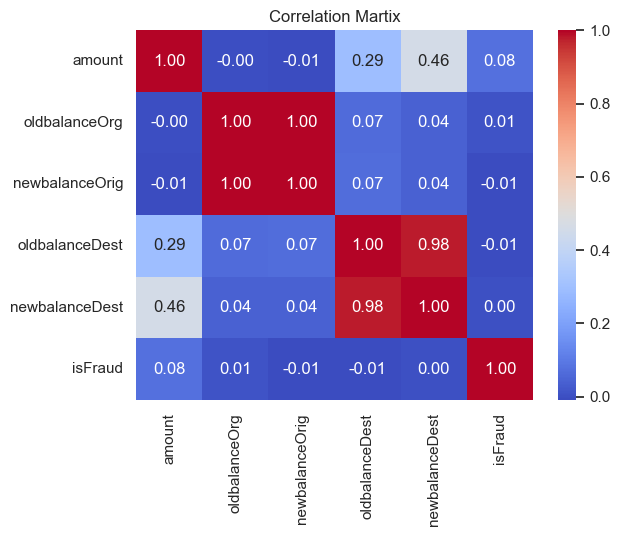

In [102]:
sns.heatmap(corr,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation Martix')
plt.show()
# 1) Create a heatmap to visualize the correlation matrix
# 2) Add a title to the heatmap
# 3) Show the plot

In [103]:
zero_after_transfer = data[
    (data['oldbalanceOrg']>0)&  # Sender had a positive balance before the transaction
    (data['newbalanceOrig'] == 0)&   # Sender's balance became zero after the transaction
    (data['type'].isin(['TRANSFER','CASH_OUT']))   # Transaction type is either 'TRANSFER' or 'CASH_OUT'
]

# Filters transactions where sender's balance drops to zero after transfer or cash out,
# indicating a potentially suspicious or high-risk transaction

In [104]:
len(zero_after_transfer)

1188074

In [105]:
zero_after_transfer.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
2,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0,181.0,0.00
3,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0,181.0,-21182.00
15,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0,15325.0,46430.44
19,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0,705.0,-22425.00
24,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0,10835.0,2712905.89


In [106]:
data['isFraud'].value_counts() # Counts how many transactions are labeled as fraud (1) and not fraud (0)

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [107]:
#  Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [108]:
data.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,-21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


In [109]:
data_model = data.drop(['nameOrig','nameDest','isFlaggedFraud'],axis=1)

# Creates a new DataFrame for modeling by dropping non-numeric or irrelevant columns:
# - 'nameOrig': Sender's account name (ID) — not useful for prediction
# - 'nameDest': Receiver's account name — also likely a random ID
# - 'isFlaggedFraud': Always 0 in most datasets, so not helpful for modeling

In [110]:
data_model.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,9839.64,0.0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,1864.28,0.0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,181.00,0.0
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,181.00,-21182.0
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,11668.14,0.0


In [111]:
categorical = ['type']
# List of categorical features — in this case, 'type' is the only categorical column (e.g., TRANSFER, PAYMENT, etc.)

numeric =['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']
# List of numerical features — these are continuous or numerical transaction-related values used for modeling

In [112]:
y = data_model['isFraud']  # Assigns the target variable 'isFraud' (1 for fraud, 0 for non-fraud) to y
x = data_model.drop('isFraud',axis = 1) # Assigns all input features (excluding the target 'isFraud') to x


In [113]:
X_train, X_test,Y_train,Y_test = train_test_split(x,y, test_size=0.3,stratify=y)

# Features and target
# 30% of the data will be used for testing
 # Ensures class distribution (fraud/non-fraud) remains the same in train and test sets

In [114]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num',StandardScaler(), numeric),  # Applies StandardScaler to numerical features
        ('cat',OneHotEncoder(drop='first'),categorical)  # Applies OneHotEncoder to categorical features, drops first category to avoid multicollinearity
    ],
    remainder='drop' # Drops any other columns not explicitly listed
)

In [115]:
pipeline = Pipeline([
    ('prep',preprocessor),   # Step 1: Apply preprocessing (scaling and encoding)
    ('clf',LogisticRegression(class_weight='balanced',max_iter=1000))   # Step 2: Train Logistic Regression with class imbalance handling
])

In [116]:
pipeline.fit(X_train,Y_train)

# Trains the entire pipeline:
# 1. Preprocesses the training data (scaling numeric, encoding categorical)
# 2. Fits the Logistic Regression model on the transformed data

,steps,"[('prep', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [117]:
y_pred = pipeline.predict(X_test)  # Uses the trained pipeline to make predictions on the test dataset

In [118]:
print(classification_report(Y_test,y_pred))  # Prints precision, recall, F1-score, and support for each class

              precision    recall  f1-score   support

           0       1.00      0.95      0.97   1906322
           1       0.02      0.94      0.04      2464

    accuracy                           0.95   1908786
   macro avg       0.51      0.94      0.51   1908786
weighted avg       1.00      0.95      0.97   1908786



In [119]:
print(confusion_matrix(Y_test,y_pred)) # Prints the confusion matrix to evaluate the model's performance on test data

[[1803340  102982]
 [    152    2312]]


In [120]:
pipeline.score(X_test,Y_test)*100  # Returns the accuracy of the model on the test set as a percentage

94.59687990167572

In [121]:
import joblib
joblib.dump(pipeline,'Fraud_dectection_pipeline.pkl')  # Saves the trained pipeline (model + preprocessing) to a file for future use

['Fraud_dectection_pipeline.pkl']

In [122]:
!pip install streamlit


Defaulting to user installation because normal site-packages is not writeable
